##  libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings

warnings.filterwarnings("ignore")




ModuleNotFoundError: No module named 'numpy'

## Load the Dataset 

In [2]:
data= pd.read_csv("C:/Users/Phoni/Downloads/RTA Dataset.csv")
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## EDA

In [3]:
print(data.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [4]:
data1 = data.dropna()
data1

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [5]:
data = data.replace(['NA', 'N/A', 'null','na'], np.nan)
cleaned_data = data.dropna()

In [6]:
cleaned_data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
19,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
21,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,18:45:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
12300,19:12:00,Tuesday,31-50,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury


In [7]:
cleaned_data.nunique()

Time                           638
Day_of_week                      7
Age_band_of_driver               5
Sex_of_driver                    3
Educational_level                7
Vehicle_driver_relation          4
Driving_experience               7
Type_of_vehicle                 17
Owner_of_vehicle                 4
Service_year_of_vehicle          6
Defect_of_vehicle                3
Area_accident_occured           12
Lanes_or_Medians                 7
Road_allignment                  8
Types_of_Junction                8
Road_surface_type                5
Road_surface_conditions          4
Light_conditions                 4
Weather_conditions               8
Type_of_collision               10
Number_of_vehicles_involved      6
Number_of_casualties             8
Vehicle_movement                13
Casualty_class                   3
Sex_of_casualty                  2
Age_band_of_casualty             5
Casualty_severity                3
Work_of_casuality                7
Fitness_of_casuality

In [8]:
print(cleaned_data.dtypes)


Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [9]:
print(cleaned_data.describe())


       Number_of_vehicles_involved  Number_of_casualties
count                  1847.000000           1847.000000
mean                      2.007580              1.541960
std                       0.622742              1.015721
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000


In [10]:
# converting 'time' to datetime
cleaned_data['Time'] = pd.to_datetime(cleaned_data['Time'])

# date (day-month-year) time
cleaned_data['Time'].dt.hour

# extracting hour and minute from timestamp
cleaned_data['hour'] = cleaned_data['Time'].dt.hour
cleaned_data['minute'] = cleaned_data['Time'].dt.minute
cleaned_data.drop('Time', axis=1, inplace=True)

In [11]:
cleaned_data

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
8,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,...,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,17,20
9,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,17,20
14,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury,17,45
19,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,No defect,...,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,8,20
21,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,No defect,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,1-2yr,No defect,...,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury,18,45
12300,Tuesday,31-50,Male,Elementary school,Owner,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Female,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury,19,12
12303,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,7,...,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,12,48
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55


## Univeriant Analysis

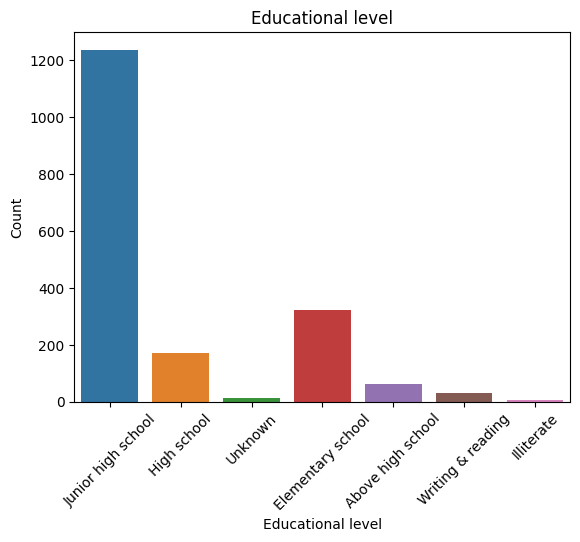

In [12]:
sns.countplot(x='Educational_level', data=cleaned_data)
plt.xlabel('Educational level')
plt.ylabel('Count')
plt.title('Educational level')
plt.xticks(rotation=45)
plt.show()


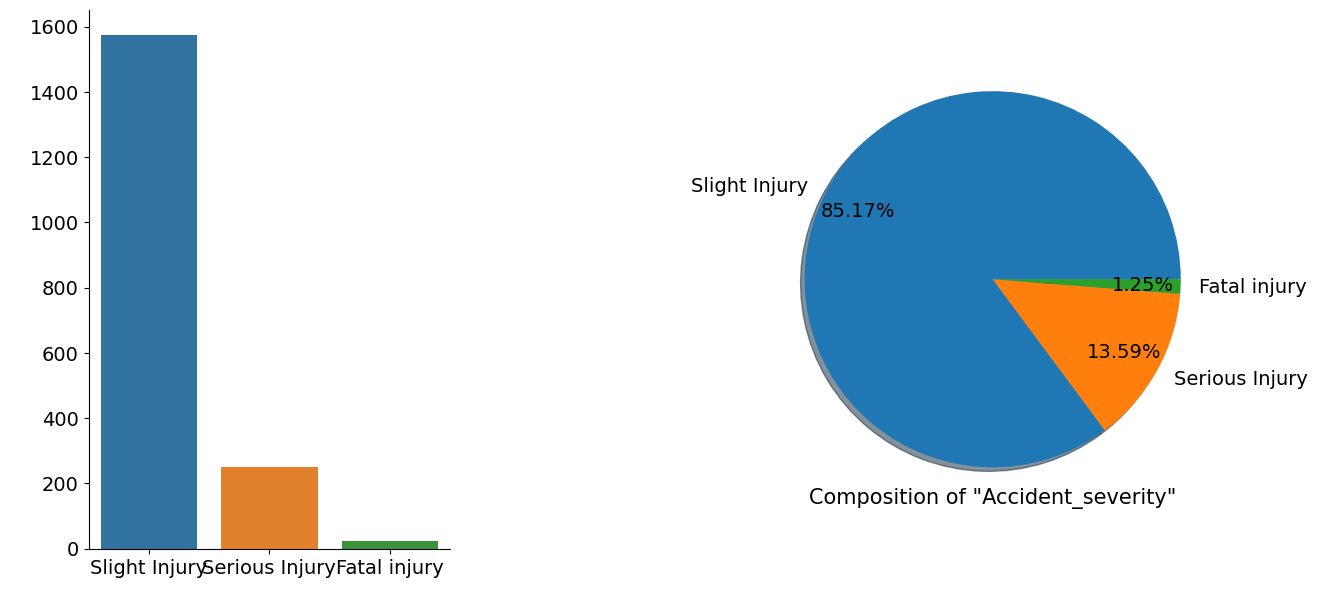

In [13]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=cleaned_data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(cleaned_data["Accident_severity"].value_counts(),
        labels=list(cleaned_data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident_severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=1)
plt.show()

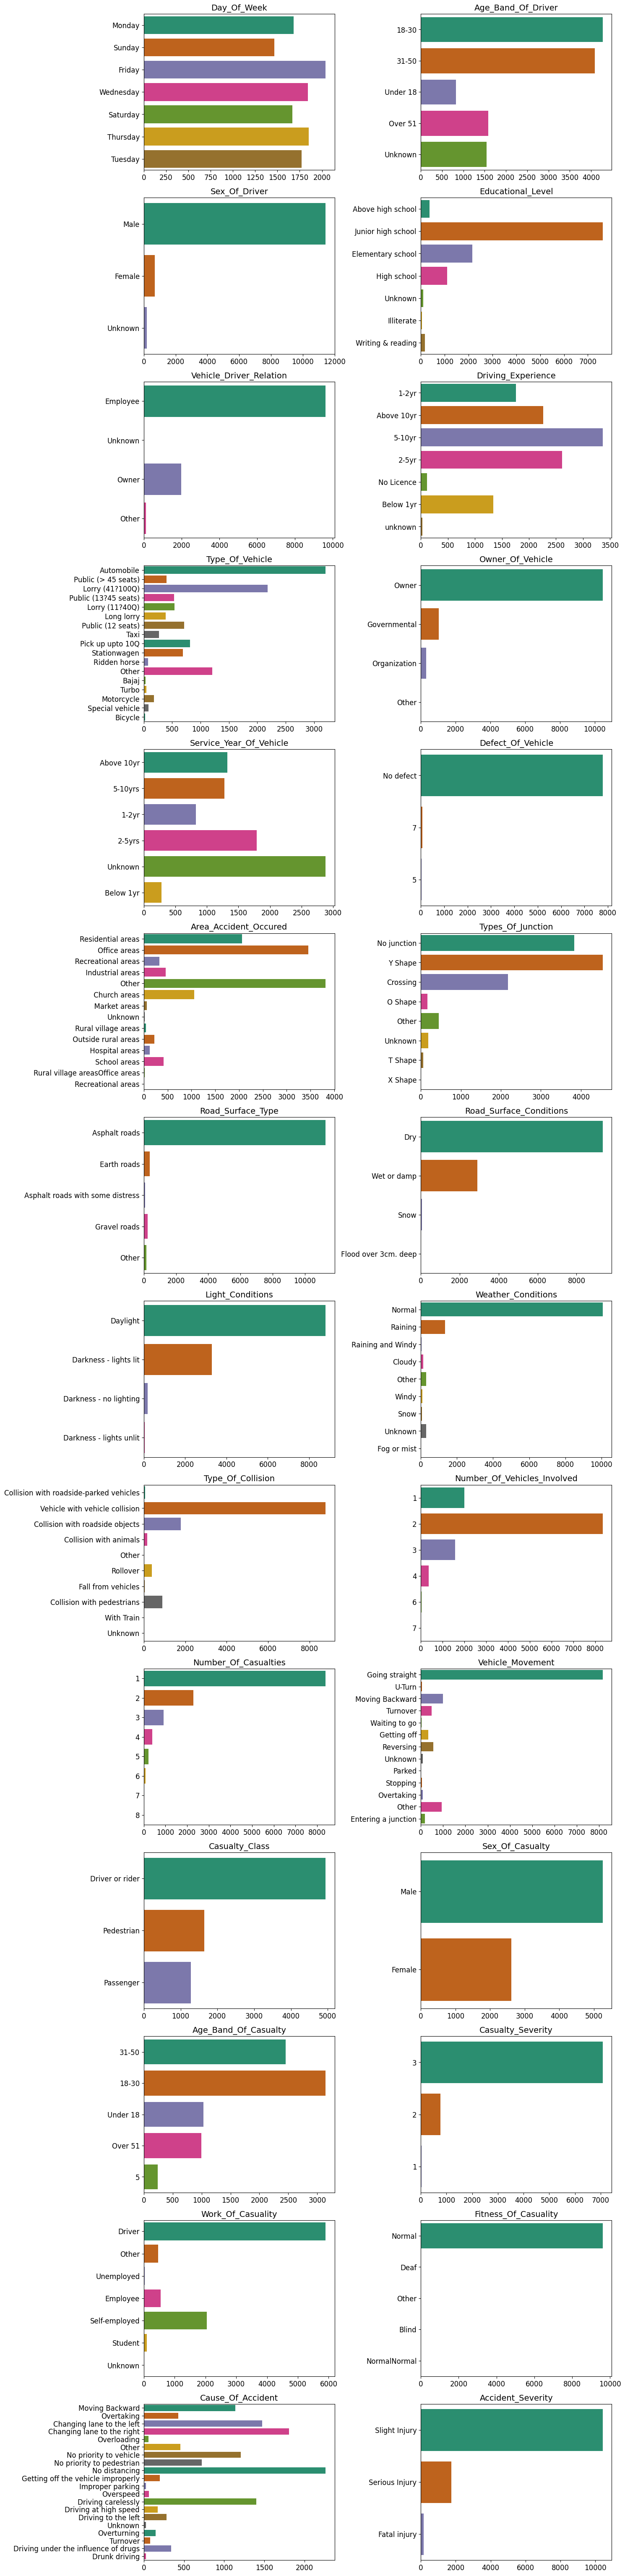

In [14]:

plt.figure(figsize=(15,70))
plotnumber = 1

for col in cleaned_data.drop(['hour', 'minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= cleaned_data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [15]:
import plotly.express as px
fig = px.treemap(cleaned_data,path=['Cause_of_accident'],width=1000, height=900)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

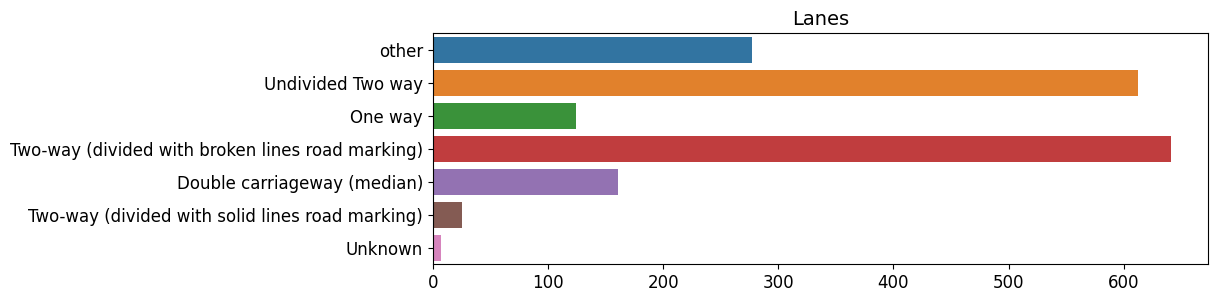

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(data=cleaned_data, y='Lanes_or_Medians')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

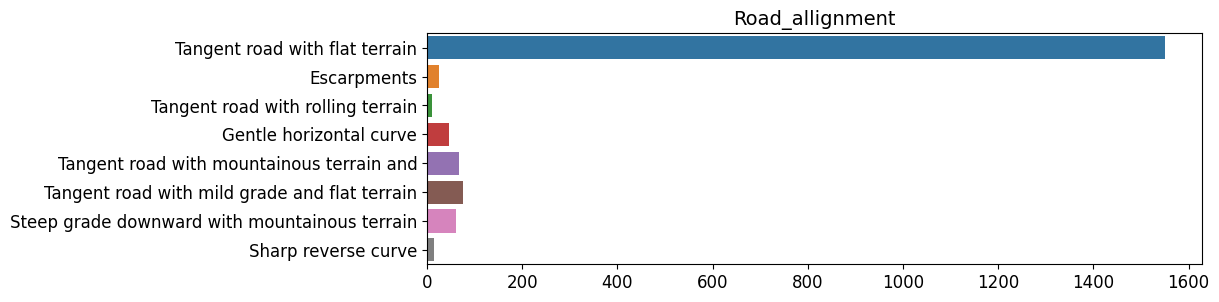

In [17]:
plt.figure(figsize=(10,3))
sns.countplot(data=cleaned_data, y='Road_allignment')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road_allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

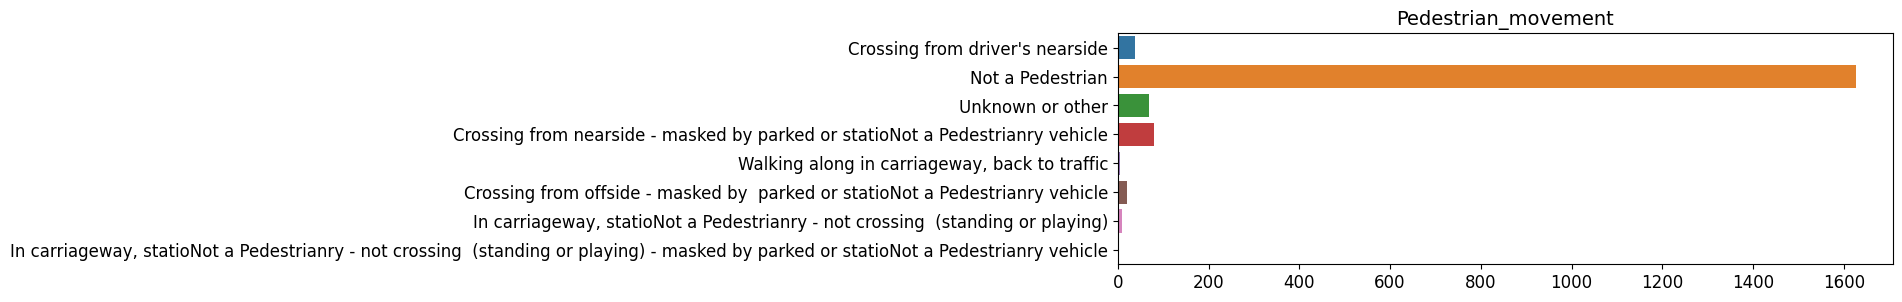

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(data=cleaned_data, y='Pedestrian_movement')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian_movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

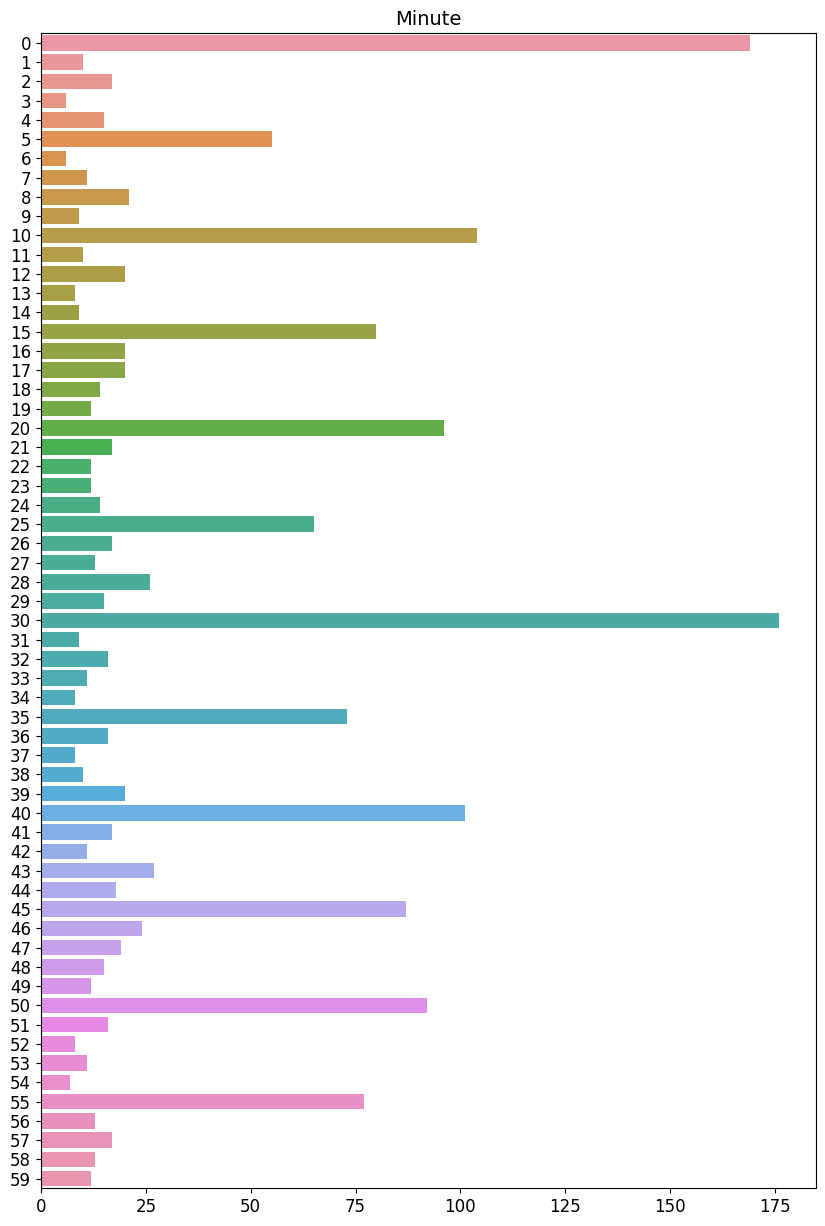

In [19]:
plt.figure(figsize=(10,15))
sns.countplot(data=cleaned_data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

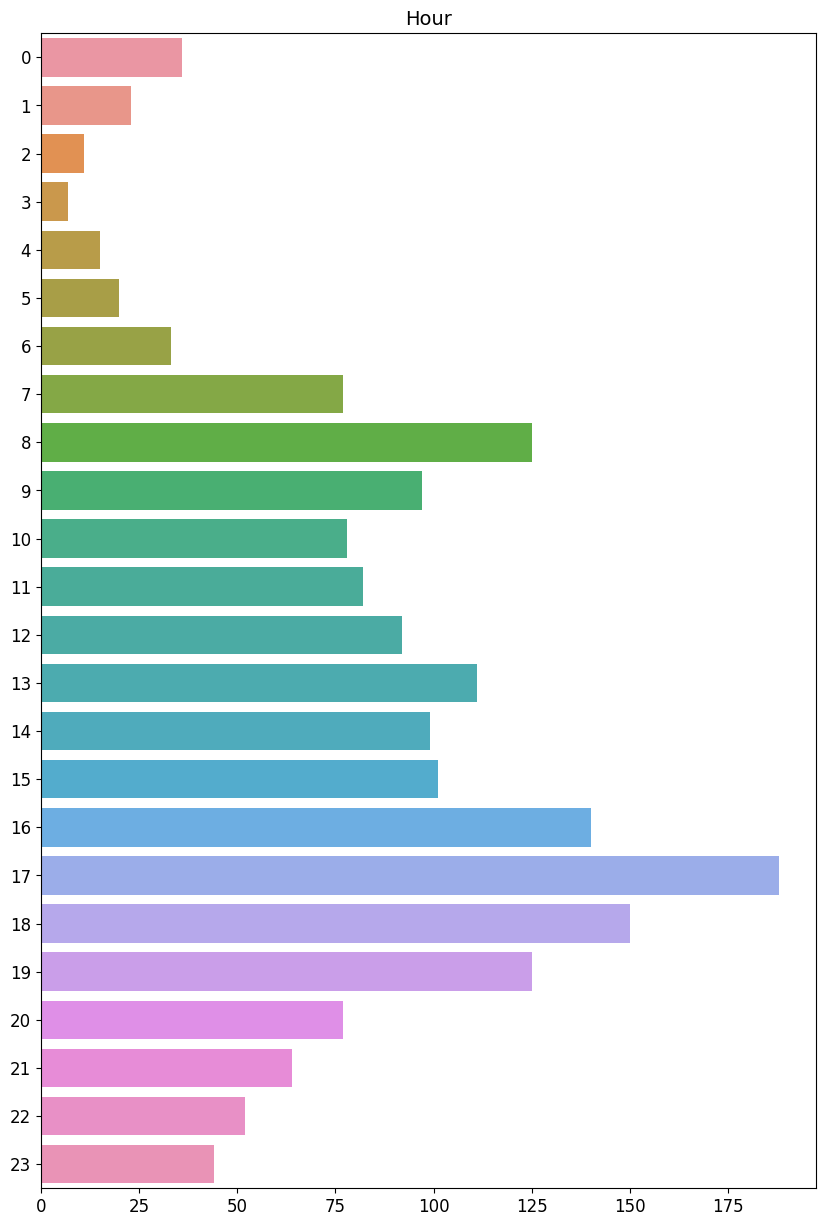

In [20]:
plt.figure(figsize=(10,15))
sns.countplot(data=cleaned_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Encoding

In [21]:
cleaned_data.shape

(1847, 33)

In [22]:
cleaned_data['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    1544
Owner        285
Other         17
Unknown        1
Name: count, dtype: int64

In [23]:
cleaned_data.drop(columns=['Defect_of_vehicle','Vehicle_driver_relation','Work_of_casuality','Fitness_of_casuality'],inplace=True)

In [24]:
impute_cols = [x for x in cleaned_data.isna().sum()[cleaned_data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = cleaned_data[feat].mode()[0]
    cleaned_data[feat].fillna(mode, inplace=True)

In [25]:
def ordinal_encoder(cleaned_data, feats): 
    for feat in feats:    
        feat_val = list(np.arange(cleaned_data[feat].nunique()))
        feat_key = list(cleaned_data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        cleaned_data[feat] = cleaned_data[feat].map(feat_dict)
    return cleaned_data

data = ordinal_encoder(cleaned_data, cleaned_data.drop(['Accident_severity'], axis=1).columns)
data.shape

(1847, 29)

In [26]:
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
8,0,0,1,4,3,5,3,0,4,6,...,2,2,1,4,2,0,1,Slight Injury,17,20
9,0,0,1,4,0,0,3,1,8,4,...,10,1,1,0,2,5,9,Serious Injury,17,20
14,4,1,1,4,3,0,3,0,6,4,...,2,0,0,0,2,5,10,Serious Injury,17,45
19,5,0,1,4,4,3,3,2,8,1,...,2,0,1,4,2,5,9,Serious Injury,8,20
21,4,0,1,4,1,4,3,2,2,4,...,3,0,1,0,2,5,16,Serious Injury,15,10


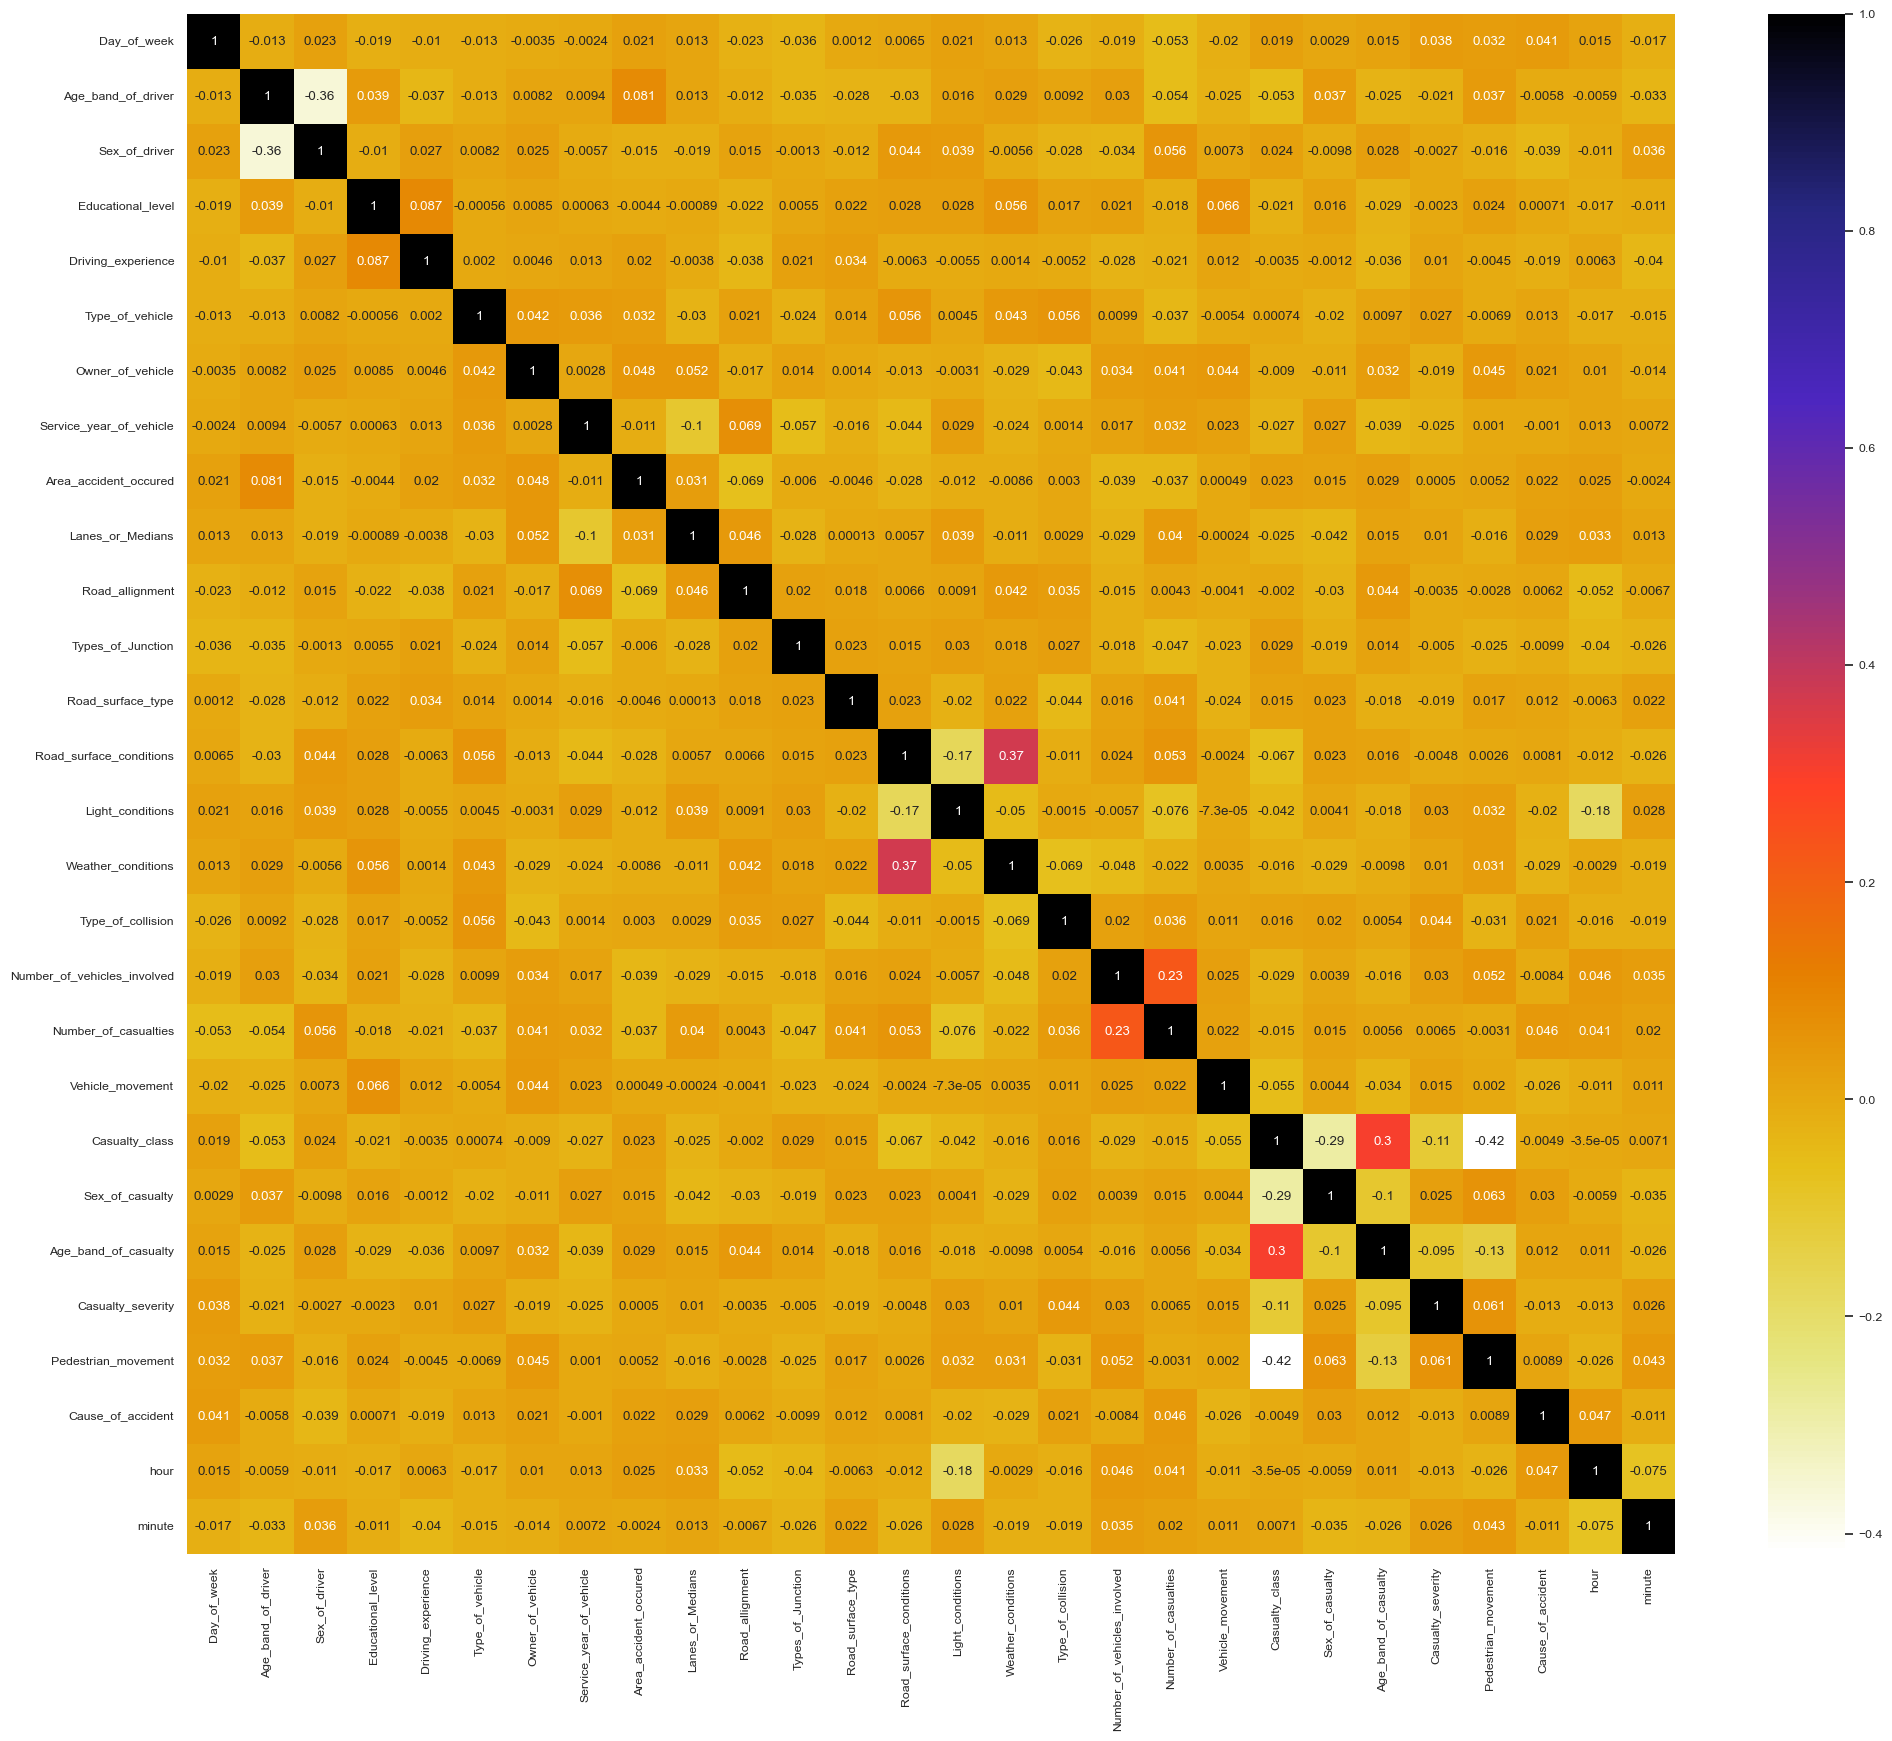

In [27]:

# 1. Exclude non-numeric columns (categorical or non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])

# 2. Generate the correlation matrix for the numeric data
correlation_matrix = numeric_data.corr()

# 3. Create a heatmap from the correlation matrix
plt.figure(figsize=(24, 20))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)

# 4. Show the heatmap
plt.show()


## unsampling

In [28]:
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1292, 28) (555, 28) (1292,) (555,)


## Applying Ordinal Encoding to Target Variable

In [29]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

## Apply feature scaling and  Define models

## XGBOOST CLASSIFIER

In [30]:
# Apply feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define models
from xgboost import XGBClassifier

# Create an XGBoost model
xgboost_model = XGBClassifier()

# Train the XGBoost model
xgboost_model.fit(X_train_scaled, y_train)

# Predict on the test set
xgboost_y_pred = xgboost_model.predict(X_test_scaled)

# Evaluate the XGBoost model
xgboost_accuracy = np.mean(xgboost_y_pred == y_test)
xgboost_report = classification_report(y_test, xgboost_y_pred)
xgboost_confusion_mat = confusion_matrix(y_test, xgboost_y_pred)


print(xgboost_confusion_mat)
print("Accuracy :",xgboost_accuracy)
print(xgboost_report)





[[  0   0   6]
 [  0   5  71]
 [  0   8 465]]
Accuracy : 0.8468468468468469
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.38      0.07      0.11        76
           2       0.86      0.98      0.92       473

    accuracy                           0.85       555
   macro avg       0.41      0.35      0.34       555
weighted avg       0.78      0.85      0.80       555



## RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
random_forest_y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the Random Forest model
random_forest_accuracy = np.mean(random_forest_y_pred == y_test)
random_forest_report = classification_report(y_test, random_forest_y_pred)
random_forest_confusion_mat = confusion_matrix(y_test, random_forest_y_pred)

print(random_forest_confusion_mat)
print("Accuracy :",random_forest_accuracy)
print(random_forest_report)


[[  0   1   5]
 [  0   0  76]
 [  0   0 473]]
Accuracy : 0.8522522522522522
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        76
           2       0.85      1.00      0.92       473

    accuracy                           0.85       555
   macro avg       0.28      0.33      0.31       555
weighted avg       0.73      0.85      0.79       555



## EXTRA TREES CLASSIFIER

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Train the Extra Trees model
extra_trees_model.fit(X_train_scaled, y_train)

# Predict on the test set
extra_trees_y_pred = extra_trees_model.predict(X_test_scaled)

# Evaluate the Extra Trees model
extra_trees_accuracy = np.mean(extra_trees_y_pred == y_test)
extra_trees_report = classification_report(y_test, extra_trees_y_pred)
extra_trees_confusion_mat = confusion_matrix(y_test, extra_trees_y_pred)

print(extra_trees_confusion_mat)
print("Accuracy :", extra_trees_accuracy)
print(extra_trees_report)


[[  0   0   6]
 [  0   0  76]
 [  0   0 473]]
Accuracy : 0.8522522522522522
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        76
           2       0.85      1.00      0.92       473

    accuracy                           0.85       555
   macro avg       0.28      0.33      0.31       555
weighted avg       0.73      0.85      0.78       555



## Accuracy 

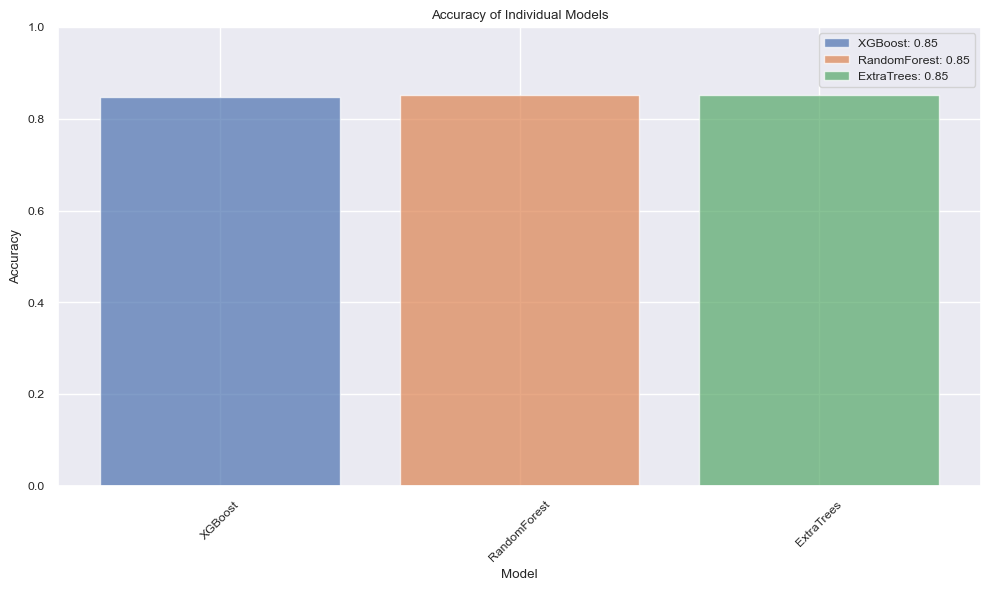

In [33]:
import matplotlib.pyplot as plt

# Create a list of model names and their corresponding models and accuracies
models = [
    ("XGBoost", xgboost_model, xgboost_accuracy),
    ("RandomForest", random_forest_model, random_forest_accuracy),
    ("ExtraTrees", extra_trees_model, extra_trees_accuracy),
]

# Create a bar plot for each model's accuracy
plt.figure(figsize=(10, 6))
for model_name, _, accuracy in models:
    plt.bar(model_name, accuracy, label=f"{model_name}: {accuracy:.2f}", alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Models')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()


## Hyperparameter Tunning

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters grid for each model
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

param_grid_randomforest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

param_grid_extratrees = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# Perform Grid Search or Randomized Search for each model
def perform_grid_search(model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print(f"Best hyperparameters for {model_name}: {best_params}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.2f}")
    
    return best_model

# Perform hyperparameter tuning for each model
best_xgboost_model = perform_grid_search(XGBClassifier(), param_grid_xgboost, 'XGBoost')
best_randomforest_model = perform_grid_search(RandomForestClassifier(random_state=42), param_grid_randomforest, 'RandomForest')
best_extratrees_model = perform_grid_search(ExtraTreesClassifier(random_state=42), param_grid_extratrees, 'ExtraTrees')

# Evaluate the best models on the test set
for model_name, best_model in [("XGBoost", best_xgboost_model), ("RandomForest", best_randomforest_model), ("ExtraTrees", best_extratrees_model)]:
    y_pred = best_model.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Results for {model_name} (after hyperparameter tuning):")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", confusion_mat)
    


Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best accuracy for XGBoost: 0.85
Best hyperparameters for RandomForest: {'max_depth': None, 'n_estimators': 200}
Best accuracy for RandomForest: 0.85
Best hyperparameters for ExtraTrees: {'max_depth': None, 'n_estimators': 100}
Best accuracy for ExtraTrees: 0.85
Results for XGBoost (after hyperparameter tuning):
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.01      0.03        76
           2       0.85      1.00      0.92       473

    accuracy                           0.85       555
   macro avg       0.62      0.34      0.32       555
weighted avg       0.86      0.85      0.79       555

Confusion Matrix:
 [[  0   0   6]
 [  0   1  75]
 [  0   0 473]]
Results for RandomForest (after hyperparameter tuning):
Accuracy: 0.85
Classification Report:
             

In [35]:
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
8,0,0,1,4,3,5,3,0,4,6,...,2,2,1,4,2,0,1,Slight Injury,17,20
9,0,0,1,4,0,0,3,1,8,4,...,10,1,1,0,2,5,9,Serious Injury,17,20
14,4,1,1,4,3,0,3,0,6,4,...,2,0,0,0,2,5,10,Serious Injury,17,45
19,5,0,1,4,4,3,3,2,8,1,...,2,0,1,4,2,5,9,Serious Injury,8,20
21,4,0,1,4,1,4,3,2,2,4,...,3,0,1,0,2,5,16,Serious Injury,15,10


In [36]:
import shap

## SHAP

In [37]:
shap.initjs()

In [38]:
sam_da=data

In [39]:
sam_da

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
8,0,0,1,4,3,5,3,0,4,6,...,2,2,1,4,2,0,1,Slight Injury,17,20
9,0,0,1,4,0,0,3,1,8,4,...,10,1,1,0,2,5,9,Serious Injury,17,20
14,4,1,1,4,3,0,3,0,6,4,...,2,0,0,0,2,5,10,Serious Injury,17,45
19,5,0,1,4,4,3,3,2,8,1,...,2,0,1,4,2,5,9,Serious Injury,8,20
21,4,0,1,4,1,4,3,2,2,4,...,3,0,1,0,2,5,16,Serious Injury,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,6,0,1,4,3,13,3,0,8,6,...,2,0,1,0,2,5,10,Slight Injury,18,45
12300,5,1,1,1,3,5,3,1,7,4,...,2,0,0,1,2,5,16,Serious Injury,19,12
12303,0,1,1,4,1,0,3,5,6,6,...,2,0,0,3,2,5,10,Slight Injury,12,48
12313,3,2,1,4,2,1,3,1,5,2,...,4,0,1,1,2,5,1,Serious Injury,13,55


In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Accident_severity' column
sam_da['Accident_severity_encoded'] = label_encoder.fit_transform(sam_da['Accident_severity'])
sam_da=sam_da.drop(columns=['Accident_severity'])



In [41]:
sam_da

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour,minute,Accident_severity_encoded
8,0,0,1,4,3,5,3,0,4,6,...,2,2,1,4,2,0,1,17,20,2
9,0,0,1,4,0,0,3,1,8,4,...,10,1,1,0,2,5,9,17,20,1
14,4,1,1,4,3,0,3,0,6,4,...,2,0,0,0,2,5,10,17,45,1
19,5,0,1,4,4,3,3,2,8,1,...,2,0,1,4,2,5,9,8,20,1
21,4,0,1,4,1,4,3,2,2,4,...,3,0,1,0,2,5,16,15,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,6,0,1,4,3,13,3,0,8,6,...,2,0,1,0,2,5,10,18,45,2
12300,5,1,1,1,3,5,3,1,7,4,...,2,0,0,1,2,5,16,19,12,1
12303,0,1,1,4,1,0,3,5,6,6,...,2,0,0,3,2,5,10,12,48,2
12313,3,2,1,4,2,1,3,1,5,2,...,4,0,1,1,2,5,1,13,55,1


In [42]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [43]:
filtered_data = sam_da[sam_da['Accident_severity_encoded']==0]

filtered_data

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour,minute,Accident_severity_encoded
89,3,1,1,4,2,0,3,1,6,0,...,7,0,1,0,2,5,9,15,17,0
523,4,1,1,2,1,0,3,5,8,1,...,2,2,1,4,2,0,10,16,36,0
635,3,0,1,4,2,0,3,0,7,6,...,2,0,1,4,2,5,3,21,15,0
1230,2,1,1,0,0,0,3,1,7,4,...,2,0,1,0,2,5,9,11,30,0
4730,4,3,1,4,0,0,3,0,7,6,...,2,2,1,0,2,5,3,19,39,0
4731,4,4,0,0,0,5,3,2,7,4,...,2,2,1,2,2,5,9,19,39,0
4732,4,0,1,4,2,8,3,2,7,1,...,2,1,0,0,2,5,10,19,39,0
5127,6,1,1,1,1,6,3,2,6,4,...,2,0,1,0,2,5,10,6,52,0
5885,2,0,1,4,1,14,3,3,7,2,...,3,2,0,3,1,6,3,12,10,0
6798,2,1,1,1,3,5,0,5,0,4,...,2,0,1,0,2,5,1,20,3,0


In [44]:

#Calculate SHAP values

import shap

# Initialize a SHAP explainer for your best model (e.g., XGBoost)
explainer = shap.Explainer(extra_trees_model)

# Calculate SHAP values for the data sample (sam_da)
shap_values = explainer.shap_values(sam_da)



In [45]:
print(shap_values)

[array([[ 5.92795876e-03,  6.22154933e-04, -1.85380059e-04, ...,
         2.44082997e-03,  7.49063979e-05,  0.00000000e+00],
       [ 5.40496428e-03,  5.83796291e-04, -1.39110487e-04, ...,
        -7.28538575e-05, -1.06833219e-03,  0.00000000e+00],
       [-4.05529109e-04, -1.57362699e-04, -1.79712406e-04, ...,
        -1.57227085e-03, -2.36372950e-03,  0.00000000e+00],
       ...,
       [ 4.17355995e-03, -1.68890526e-04, -1.28534637e-04, ...,
         3.84126684e-03,  2.00197051e-03,  0.00000000e+00],
       [-6.43436296e-04, -1.21958849e-03, -1.50614179e-04, ...,
        -1.31697229e-03, -1.44444840e-04,  0.00000000e+00],
       [-4.42831950e-05,  5.24025399e-04, -9.48961534e-05, ...,
         1.87010241e-03, -2.15459187e-03,  0.00000000e+00]]), array([[ 4.88815484e-03,  6.99051494e-03,  5.55003138e-05, ...,
         2.47702558e-02,  1.44160631e-03,  0.00000000e+00],
       [-6.92043550e-03,  5.80608788e-03, -5.46227710e-03, ...,
         2.13285079e-02, -2.83546193e-03,  0.00000000

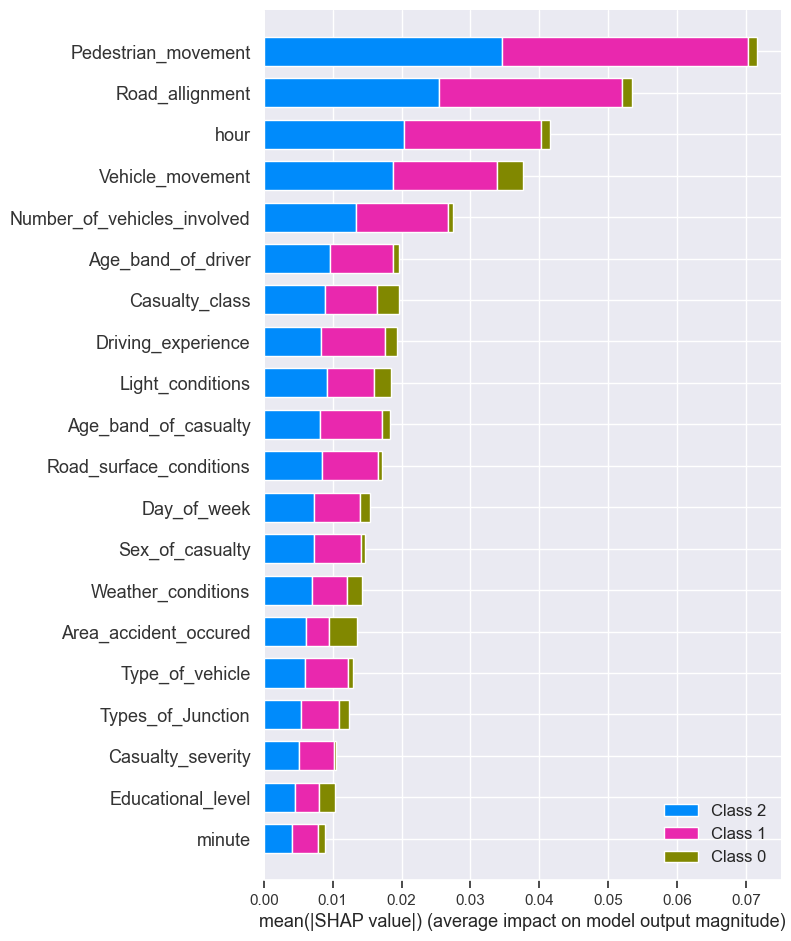

In [46]:
shap.summary_plot(shap_values,sam_da, plot_type="bar")


In [47]:
shap.force_plot(shap.TreeExplainer(extra_trees_model).expected_value[0],
                shap_values[0][:100], 
                sam_da[:100])

In [48]:
# Replace with any valid index
i = 0

print(sam_da['Accident_severity_encoded'].iloc[i]," - Slight Injury")  # Print the 'Accident_severity_encoded' value

shap.force_plot(
    shap.TreeExplainer(extra_trees_model).expected_value[0],
    shap_values[0][i],
    sam_da.iloc[i].values,
    feature_names=sam_da.columns
)


2  - Slight Injury


In [49]:
# Replace with any valid index
b = 1

print(sam_da['Accident_severity_encoded'].iloc[b]," - Serious Injury")  # Print the 'Accident_severity_encoded' value

shap.force_plot(
    shap.TreeExplainer(extra_trees_model).expected_value[0],
    shap_values[0][b],
    sam_da.iloc[b].values,
    feature_names=sam_da.columns
)


1  - Serious Injury


In [50]:
# Replace with any valid index
g = 89

print(sam_da['Accident_severity_encoded'].iloc[b]," - Fatal Injury")  # Print the 'Accident_severity_encoded' value

shap.force_plot(
    shap.TreeExplainer(extra_trees_model).expected_value[0],
    shap_values[0][b],
    sam_da.iloc[b].values,
    feature_names=sam_da.columns
)


1  - Fatal Injury


2  - Slight Injury


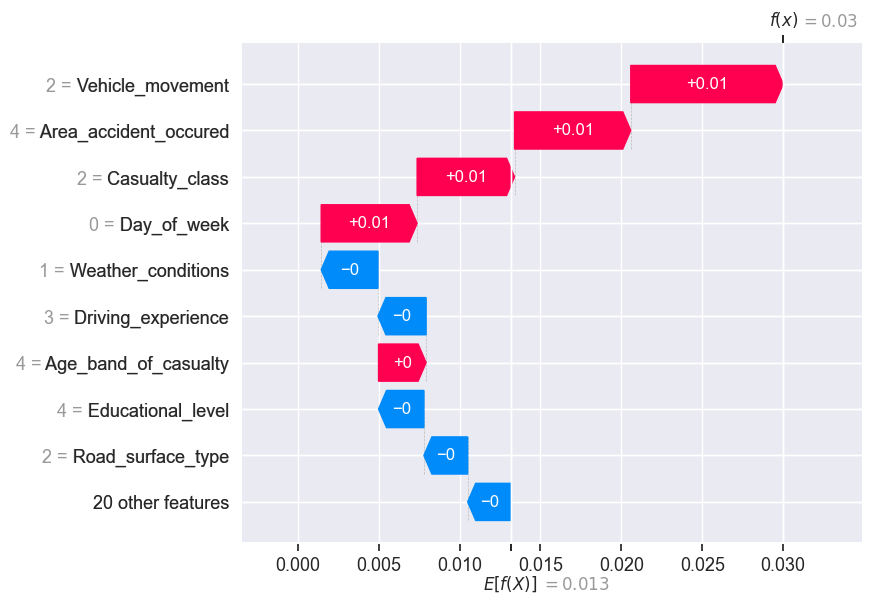

In [51]:
row = 0
print(sam_da['Accident_severity_encoded'].iloc[row]," - Slight Injury") 
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extra_trees_model).expected_value[0], data=sam_da.iloc[row],  
                                         feature_names=sam_da.columns.tolist()))

1  - Serious Injury


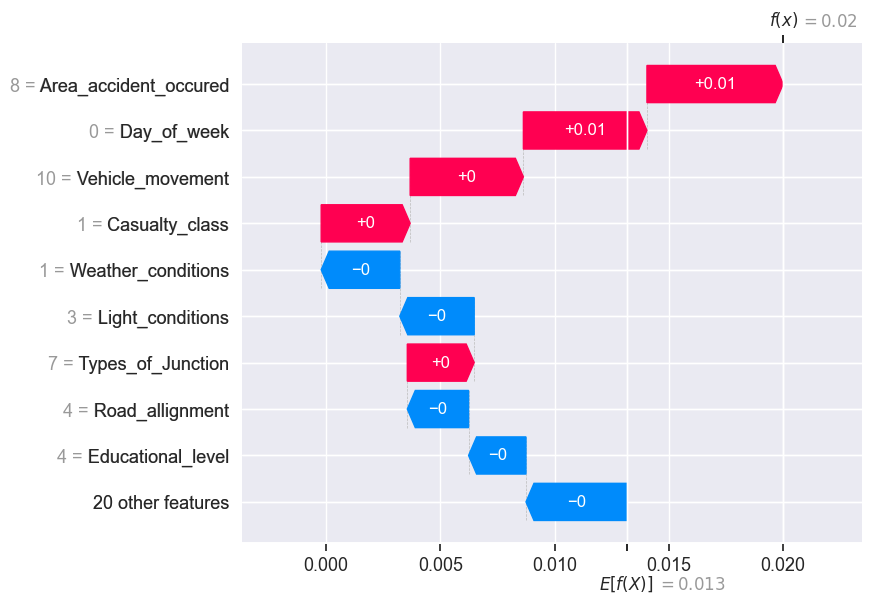

In [52]:
row = 1
print(sam_da['Accident_severity_encoded'].iloc[row]," - Serious Injury") 
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extra_trees_model).expected_value[0], data=sam_da.iloc[row],  
                                         feature_names=sam_da.columns.tolist()))

1  - Serious Injury


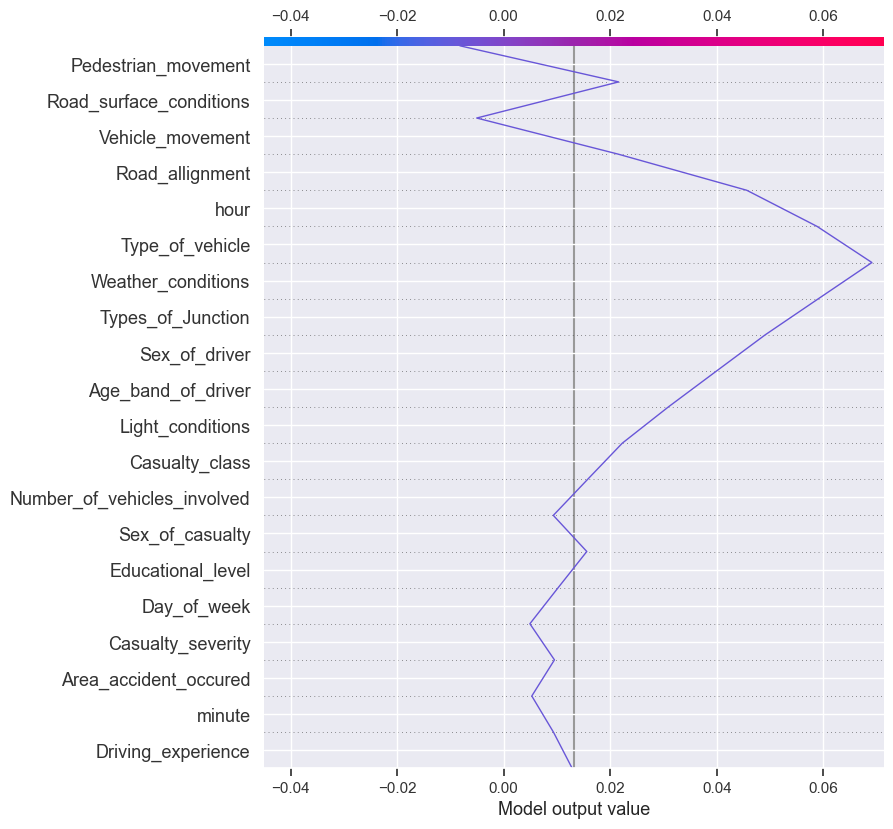

In [53]:
row = 30
print(sam_da['Accident_severity_encoded'].iloc[row]," - Serious Injury") 
shap.decision_plot(shap.TreeExplainer(extra_trees_model).expected_value[0], 
                   shap_values[2][row], 
                   feature_names=sam_da.columns.tolist())

509    2
511    2
517    2
520    2
521    2
522    2
Name: Accident_severity_encoded, dtype: int32  - Serious Injury


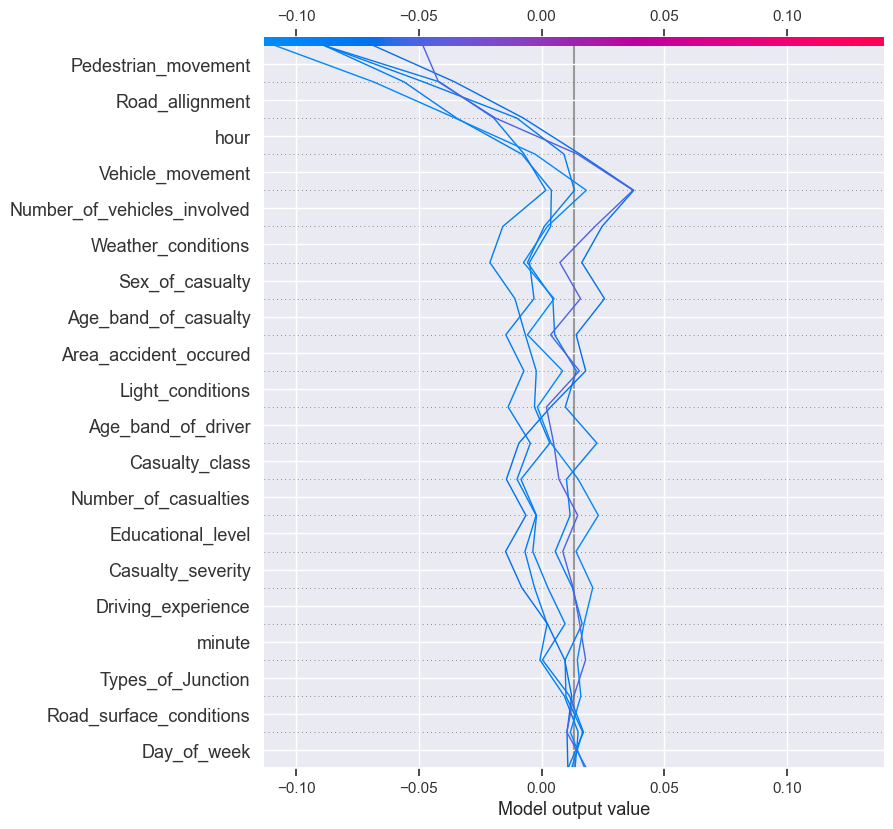

In [54]:
row = [87,93]
print(sam_da['Accident_severity_encoded'].iloc[row[0]:row[1]]," - Serious Injury") 
shap.decision_plot(shap.TreeExplainer(extra_trees_model).expected_value[0], 
                   shap_values[2][row[0]:row[1]], 
                   feature_names=sam_da.columns.tolist())